In [1]:
# 파이썬 ≥3.5 필수

import sys

assert sys.version_info >= (3, 5)


# 사이킷런 ≥0.20 필수

import sklearn

assert sklearn.__version__ >= "0.20"


# 텐서플로 ≥2.0 필수

import tensorflow as tf

assert tf.__version__ >= "2.0"


# 공통 모듈 임포트

import numpy as np

import os


# 노트북 실행 결과를 동일하게 유지하기 위해

np.random.seed(42)


# 깔끔한 그래프 출력을 위해

%matplotlib inline

import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)

mpl.rc('xtick', labelsize=12)

mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치

PROJECT_ROOT_DIR = "."

CHAPTER_ID = "ann"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)

  print("그림 저장:", fig_id)

  if tight_layout:

    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)


# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)

import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")



## 퍼셉트론

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [3]:
y_pred

array([1])

## 텐서플로
### 이미지 분류기 생성


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.0'

In [6]:
keras.__version__

'2.4.0'

In [72]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
X_train_full.shape

(60000, 28, 28)

In [74]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

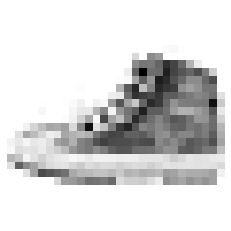

In [75]:
plt.imshow(X_train[2], cmap="binary")
plt.axis("off")
plt.show()

In [76]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [77]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",

"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



In [78]:
class_names[y_train[0]]

'Coat'

그림 저장: fashion_mnist_plot


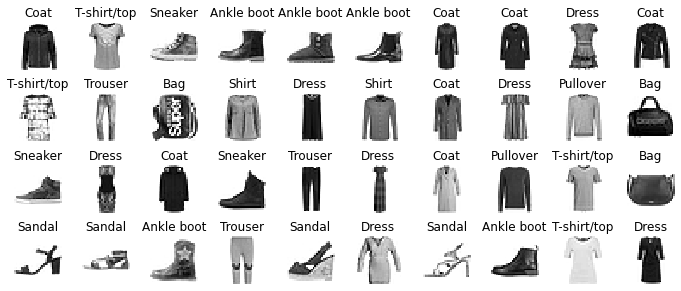

In [79]:
 n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap="binary",interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]], fontsize=12)
plt. subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("fashion_mnist_plot", tight_layout=False)
plt.show()

In [80]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# 클래스 개수만큼 10개

In [81]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")                    
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- loss="sparse_categorical_crossentropy" 
- optimizer="sgd" : 확률적 경사하강법
- metrics=["accuracy"])

이진 분류를 수행한다면 출력측에 "sigmoid" 사용하고 "binary_crossentropy" 손실 사용

In [84]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7104 - accuracy: 0.7663 - val_loss: 0.5246 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4888 - accuracy: 0.8287 - val_loss: 0.4391 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4435 - accuracy: 0.8442 - val_loss: 0.5544 - val_accuracy: 0.7922
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4167 - accuracy: 0.8553 - val_loss: 0.3947 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3979 - accuracy: 0.8617 - val_loss: 0.3825 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8667 - val_loss: 0.3772 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8711 - val_loss: 0.3703 - val_accuracy:

In [21]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

그림 저장: keras_learning_curves_plot


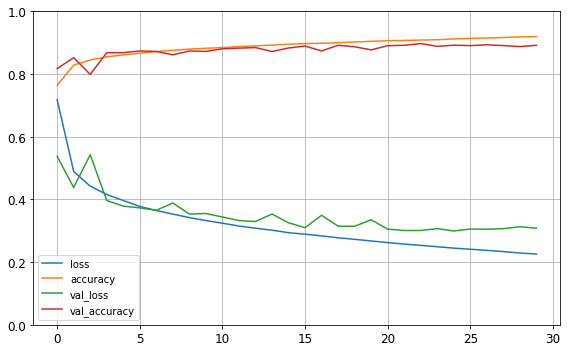

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

### 테스트 셋으로 모델을 평가하여 일반화 오차를 추정

In [23]:
model.evaluate(X_test, y_test
               )

313/313 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8816


[0.3353757858276367, 0.881600022315979]

## 모델을 사용해 예측

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
enumerate(X_new)

그림 저장: fashion_mnist_images_plot


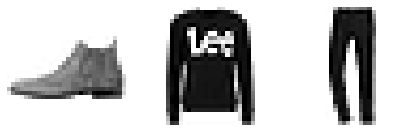

In [40]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("fashion_mnist_images_plot", tight_layout = False)
plt.show()

## 회귀 MLP

In [68]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_vaild = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [69]:
y_valid.shape

(5000,)

- 하나의 값을 예측하기 때문에 출력층이 활성화 함수가 없는 하나의 뉴런
- 손실 함수로 평균 제곱 오차 사용

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([

keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),

keras.layers.Dense(1)

])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]

y_pred = model.predict(X_new)



Epoch 1/20
309/363 [========================>.....] - ETA: 0s - loss: 2.0799

ValueError: ignored

## 모델 저장

In [85]:
model.save("my_keras_model.h5")

In [86]:
model = keras.models.load_model("my_keras_model.h5")

## 콜백

In [88]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2216 - accuracy: 0.1034
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2185 - accuracy: 0.1030
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2143 - accuracy: 0.1026
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2112 - accuracy: 0.1031
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2093 - accuracy: 0.1029
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2036 - accuracy: 0.1025
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.1028
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1987 - accuracy: 0.1028
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1946 - accuracy: 0.1028
Epoch 10/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.192

In [91]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
# save_best_only : 검증셋에서 최상의 점수를 낸 모델 저장
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1724 - accuracy: 0.1023 - val_loss: 0.2988 - val_accuracy: 0.0910
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.1021 - val_loss: 0.2973 - val_accuracy: 0.0912
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1672 - accuracy: 0.1020 - val_loss: 0.3563 - val_accuracy: 0.0846
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1653 - accuracy: 0.1027 - val_loss: 0.3168 - val_accuracy: 0.1080
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.1024 - val_loss: 0.2926 - val_accuracy: 0.0846
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1602 - accuracy: 0.1019 - val_loss: 0.3219 - val_accuracy: 0.1246
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1578 - accuracy: 0.1023 - val_loss: 0.3048 - val_accuracy:

### 조기종료

In [93]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                  restore_best_weights = True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.1021 - val_loss: 0.2993 - val_accuracy: 0.0878
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1573 - accuracy: 0.1020 - val_loss: 0.3000 - val_accuracy: 0.0924
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.1019 - val_loss: 0.3615 - val_accuracy: 0.0852
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1522 - accuracy: 0.1024 - val_loss: 0.3248 - val_accuracy: 0.1078
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1505 - accuracy: 0.1020 - val_loss: 0.2970 - val_accuracy: 0.0852
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1477 - accuracy: 0.1018 - val_loss: 0.3346 - val_accuracy: 0.1300
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1458 - accuracy: 0.1021 - val_loss: 0.3103 - val_ac

## 텐서보드 : 인터렉티브 시각화 도구